In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Reading the file


In [ ]:
df=pd.read_csv('/content/austo_automobile+(2)+(1) (3).csv')

check duplicates

In [ ]:
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))


Number of duplicate rows = 0


In [ ]:
df


,Age,Gender,Profession,Marital_status,Education,No_of_Dependents,Personal_loan,House_loan,Partner_working,Salary,Partner_salary,Total_salary,Price,Make
0,53,Male,Business,Married,Post Graduate,4,No,No,Yes,99300,70700.0,170000,61000,SUV
1,53,Femal,Salaried,Married,Post Graduate,4,Yes,No,Yes,95500,70300.0,165800,61000,SUV
2,53,Female,Salaried,Married,Post Graduate,3,No,No,Yes,97300,60700.0,158000,57000,SUV
3,53,Female,Salaried,Married,Graduate,2,Yes,No,Yes,72500,70300.0,142800,61000,SUV
4,53,Male,Salaried,Married,Post Graduate,3,No,No,Yes,79700,60200.0,139900,57000,SUV
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1576,22,Male,Salaried,Single,Graduate,2,No,Yes,No,33300,0.0,33300,27000,Hatchback
1577,22,Male,Business,Married,Graduate,4,No,No,No,32000,NaN,32000,31000,Hatchback
1578,22,Male,Business,Single,Graduate,2,No,Yes,No,32900,0.0,32900,30000,Hatchback
1579,22,Male,Business,Married,Graduate,3,Yes,Yes,No,32200,NaN,32200,24000,Hatchback


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1581 entries, 0 to 1580
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               1581 non-null   int64  
 1   Gender            1528 non-null   object 
 2   Profession        1581 non-null   object 
 3   Marital_status    1581 non-null   object 
 4   Education         1581 non-null   object 
 5   No_of_Dependents  1581 non-null   int64  
 6   Personal_loan     1581 non-null   object 
 7   House_loan        1581 non-null   object 
 8   Partner_working   1581 non-null   object 
 9   Salary            1581 non-null   int64  
 10  Partner_salary    1475 non-null   float64
 11  Total_salary      1581 non-null   int64  
 12  Price             1581 non-null   int64  
 13  Make              1581 non-null   object 
dtypes: float64(1), int64(5), object(8)
memory usage: 173.0+ KB


check missing values

In [ ]:
df.isnull().sum()

Age                   0
Gender               53
Profession            0
Marital_status        0
Education             0
No_of_Dependents      0
Personal_loan         0
House_loan            0
Partner_working       0
Salary                0
Partner_salary      106
Total_salary          0
Price                 0
Make                  0
dtype: int64

In [ ]:
df[df['Partner_salary'].isna()]

,Age,Gender,Profession,Marital_status,Education,No_of_Dependents,Personal_loan,House_loan,Partner_working,Salary,Partner_salary,Total_salary,Price,Make
40,53,Female,Salaried,Married,Graduate,1,Yes,No,No,72100,NaN,72100,60000,SUV
43,52,Male,Salaried,Married,Post Graduate,3,No,No,Yes,87600,NaN,88200,51000,SUV
49,52,Female,Business,Married,Post Graduate,4,No,No,Yes,90300,NaN,170400,69000,SUV
59,54,Male,Salaried,Married,Graduate,3,Yes,No,Yes,80600,NaN,81000,51000,SUV
111,48,Female,Business,Married,Graduate,3,No,No,Yes,90300,NaN,161100,62000,SUV
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1559,22,Male,Business,Married,Post Graduate,3,Yes,No,No,52100,NaN,52100,28000,Hatchback
1567,22,Male,Salaried,Single,Graduate,0,Yes,Yes,No,39700,NaN,39700,23000,Hatchback
1568,22,Male,Salaried,Married,Graduate,3,No,Yes,No,38000,NaN,38000,23000,Sedan
1577,22,Male,Business,Married,Graduate,4,No,No,No,32000,NaN,32000,31000,Hatchback


replace missing values of Partner_salary, as diff between total salary and salary

In [ ]:
df["Partner_salary"].replace(np.nan,0,inplace=True)

In [ ]:
df['Partner_salary1']=df.Total_salary - df.Salary

In [ ]:
df['check']=df['Partner_salary1']-df['Partner_salary']

In [ ]:
df.check.unique()

array([    0.,   600., 80100.,   400., 70800., 70500., 35300., 38600.,
       38400., 38700., 40100., 28500., 28700., 24200., 25800., 26700.])

In [ ]:
df.drop(['Partner_salary'],axis=1,inplace=True)

renamig newly made column

In [ ]:
df.rename(columns = {'Partner_salary1':'Partner_salary'}, inplace = True)

In [ ]:
df.isnull().sum()

Age                  0
Gender              53
Profession           0
Marital_status       0
Education            0
No_of_Dependents     0
Personal_loan        0
House_loan           0
Partner_working      0
Salary               0
Total_salary         0
Price                0
Make                 0
Partner_salary       0
check                0
dtype: int64

In [ ]:
df.Gender.value_counts()

Male      1199
Female     327
Femal        1
Femle        1
Name: Gender, dtype: int64

replacing miss spelled values

In [ ]:
df["Gender"].replace('Femle','Female',inplace=True)
df["Gender"].replace('Femal','Female',inplace=True)

In [ ]:
df.Gender.value_counts(normalize=True)

Male      0.784686
Female    0.215314
Name: Gender, dtype: float64

In [ ]:
mode1=df["Gender"].mode().values[0]
df["Gender"]=df["Gender"].replace(np.nan,mode1)

In [ ]:
df.Gender.value_counts(normalize=True)

Male      0.791904
Female    0.208096
Name: Gender, dtype: float64

In [ ]:
df.isnull().sum()

Age                 0
Gender              0
Profession          0
Marital_status      0
Education           0
No_of_Dependents    0
Personal_loan       0
House_loan          0
Partner_working     0
Salary              0
Total_salary        0
Price               0
Make                0
Partner_salary      0
check               0
dtype: int64

#### Univariate Analysis

In [ ]:
df[['Age','Salary','Partner_salary','Total_salary','Price']].describe()

,Age,Salary,Partner_salary,Total_salary,Price
count,1581.000000,1581.000000,1581.000000,1581.000000,1581.000000
mean,31.922201,60392.220114,19233.776091,79625.996205,35597.722960
std,8.425978,14674.825044,19670.391171,25545.857768,13633.636545
min,22.000000,30000.000000,0.000000,30000.000000,18000.000000
25%,25.000000,51900.000000,0.000000,60500.000000,25000.000000
50%,29.000000,59500.000000,25100.000000,78000.000000,31000.000000
75%,38.000000,71800.000000,38100.000000,95900.000000,47000.000000
max,54.000000,99300.000000,80500.000000,171000.000000,70000.000000


plotting garphs for each variable

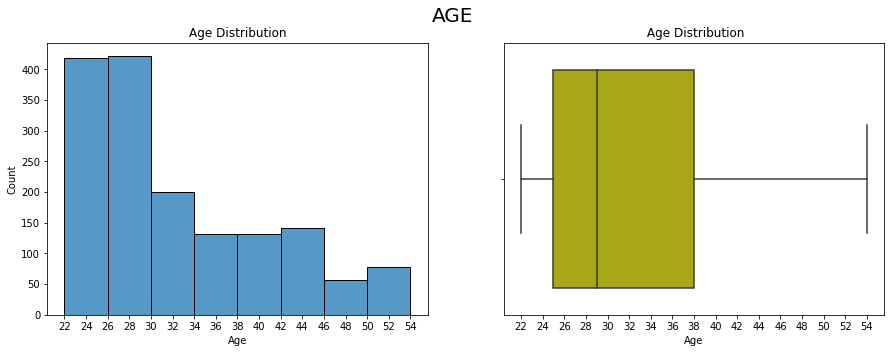

In [ ]:

fig, axes = plt.subplots(1, 2, sharex=True, figsize=(15,5))
sns.boxplot(data=df, x='Age',ax=axes[1],color='y')
plt.xticks(np.arange(20,55,2))
axes[1].set_title(" Age Distribution")

sns.histplot(data=df, x='Age', binwidth=4,ax=axes[0])
axes[0].set_title("Age Distribution")
plt.suptitle('AGE',fontsize=20)

plt.show()


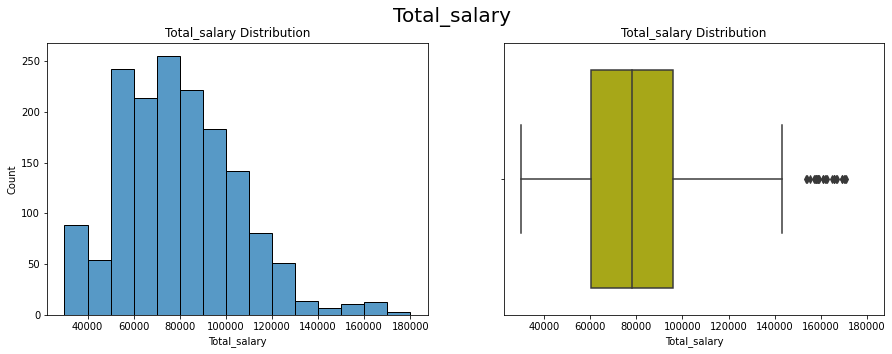

In [ ]:


fig, axes = plt.subplots(1, 2, sharex=True, figsize=(15,5))
sns.boxplot(data=df, x='Total_salary',ax=axes[1],color='y')

axes[1].set_title("Total_salary Distribution")

sns.histplot(data=df, x='Total_salary', binwidth=10000,ax=axes[0])
axes[0].set_title("Total_salary Distribution")
plt.suptitle('Total_salary',fontsize=20)
plt.show()

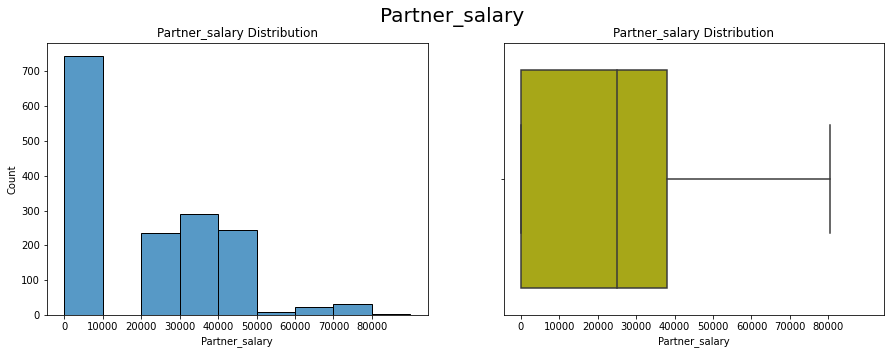

In [ ]:

fig, axes = plt.subplots(1, 2, sharex=True, figsize=(15,5))
sns.boxplot(data=df, x='Partner_salary',ax=axes[1],color='y')
axes[1].set_title("Partner_salary Distribution")
axes[1].set_xticks(np.arange(0,90000,10000))

sns.histplot(data=df, x='Partner_salary', binwidth=10000,ax=axes[0])
axes[0].set_title("Partner_salary Distribution")
plt.suptitle('Partner_salary',fontsize=20)
plt.show()

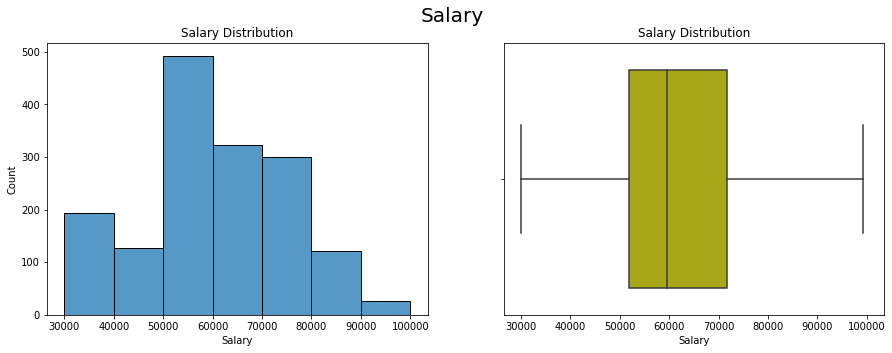

In [ ]:

fig, axes = plt.subplots(1, 2, sharex=True, figsize=(15,5))
sns.boxplot(data=df, x='Salary',ax=axes[1],color='y')
axes[1].set_title("Salary Distribution")
axes[1].set_xticks(np.arange(0,200000,10000))

sns.histplot(data=df, x='Salary', binwidth=10000,ax=axes[0])
axes[0].set_title("Salary Distribution")
plt.suptitle('Salary',fontsize=20)
plt.show()

In [ ]:
a=(df.Partner_salary.mean())
b=(df.Salary.mean())
a/b*100

31.848102379448694

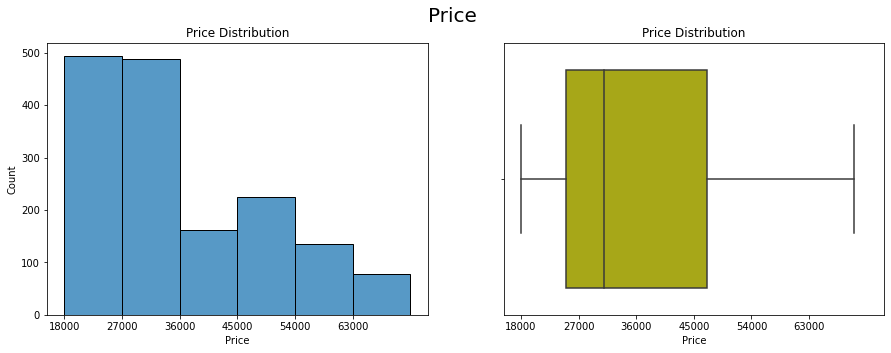

In [ ]:
fig, axes = plt.subplots(1, 2, sharex=True, figsize=(15,5))
sns.boxplot(data=df, x='Price',ax=axes[1],color='y')
plt.xticks(np.arange(18000,70000,9000))
axes[1].set_title("Price Distribution")

sns.histplot(data=df, x='Price', binwidth=9000,ax=axes[0])
axes[0].set_title("Price Distribution")
plt.suptitle('Price',fontsize=20)
plt.show()

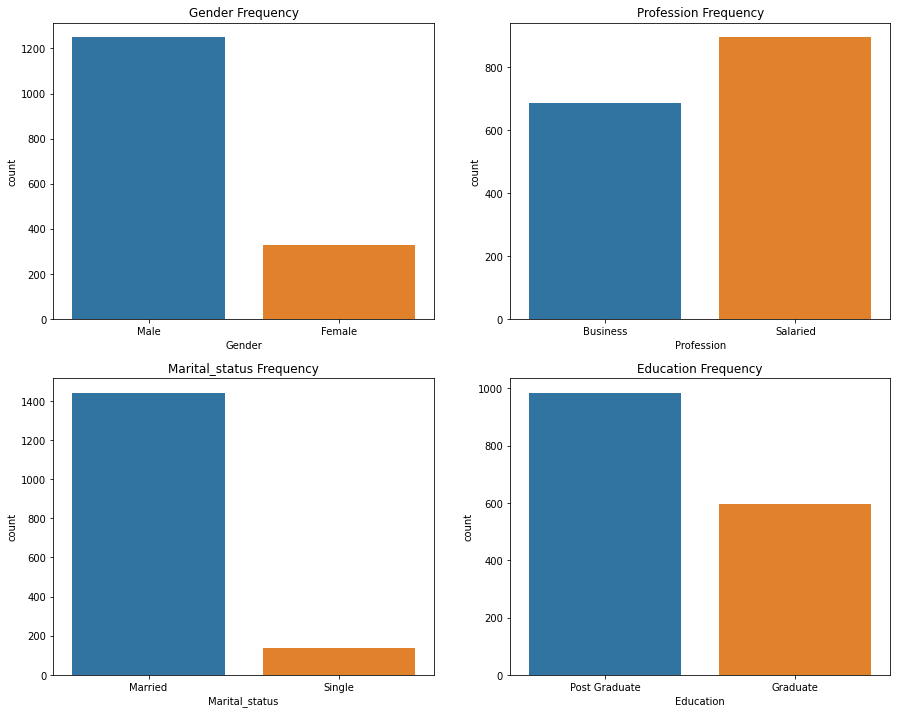

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(15,12))
sns.countplot(data=df,x='Gender',ax=axes[0,0])

sns.countplot(data=df,x='Profession',ax=axes[0,1])
sns.countplot(data=df,x='Marital_status',ax=axes[1,0])
sns.countplot(data=df,x='Education',ax=axes[1,1])

axes[0,0].set_title("Gender Frequency")
axes[0,1].set_title("Profession Frequency")
axes[1,0].set_title("Marital_status Frequency")
axes[1,1].set_title("Education Frequency")


plt.show()

In [ ]:
df.columns

Index(['Age', 'Gender', 'Profession', 'Marital_status', 'Education',
       'No_of_Dependents', 'Personal_loan', 'House_loan', 'Partner_working',
       'Salary', 'Total_salary', 'Price', 'Make', 'Partner_salary', 'check'],
      dtype='object')

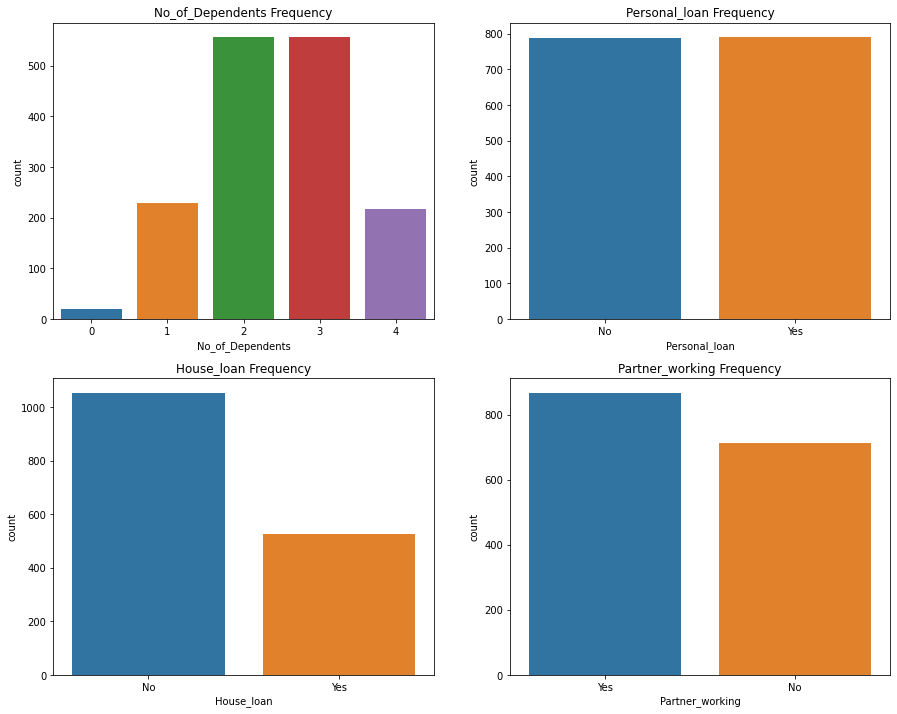

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(15,12))
sns.countplot(data=df,x='No_of_Dependents',ax=axes[0,0])

sns.countplot(data=df,x='Personal_loan',ax=axes[0,1])
sns.countplot(data=df,x='House_loan',ax=axes[1,0])
sns.countplot(data=df,x='Partner_working',ax=axes[1,1])

axes[0,0].set_title("No_of_Dependents Frequency")
axes[0,1].set_title("Personal_loan Frequency")
axes[1,0].set_title("House_loan Frequency")
axes[1,1].set_title("Partner_working Frequency")


plt.show()

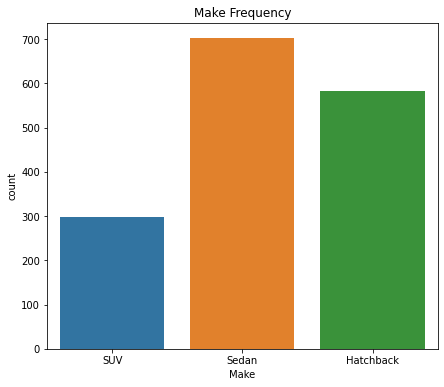

In [ ]:
plt.figure(figsize=(7, 6))
sns.countplot(data=df,x='Make')
plt.title('Make Frequency')
plt.show()

In [ ]:
df.columns

Index(['Age', 'Gender', 'Profession', 'Marital_status', 'Education',
       'No_of_Dependents', 'Personal_loan', 'House_loan', 'Partner_working',
       'Salary', 'Total_salary', 'Price', 'Make', 'Partner_salary', 'check'],
      dtype='object')

In [ ]:
c=[ 'Gender', 'Profession', 'Marital_status', 'Education',
       'No_of_Dependents', 'Personal_loan', 'House_loan', 'Partner_working','Make']

In [ ]:
for i in c:
  print(df[i].value_counts(normalize=True))

Male      0.791904
Female    0.208096
Name: Gender, dtype: float64
Salaried    0.56673
Business    0.43327
Name: Profession, dtype: float64
Married    0.912713
Single     0.087287
Name: Marital_status, dtype: float64
Post Graduate    0.623023
Graduate         0.376977
Name: Education, dtype: float64
3    0.352309
2    0.352309
1    0.144845
4    0.137887
0    0.012650
Name: No_of_Dependents, dtype: float64
Yes    0.500949
No     0.499051
Name: Personal_loan, dtype: float64
No     0.666667
Yes    0.333333
Name: House_loan, dtype: float64
Yes    0.54902
No     0.45098
Name: Partner_working, dtype: float64
Sedan        0.444023
Hatchback    0.368121
SUV          0.187856
Name: Make, dtype: float64


Lets find out important patterns that can help  business through different graphs

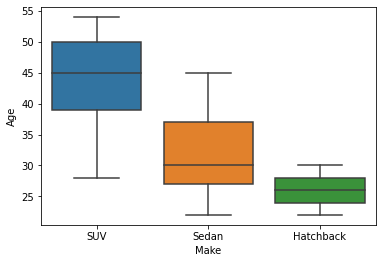

In [ ]:
import seaborn as sns

sns.boxplot(x="Make", y="Age", data=df)

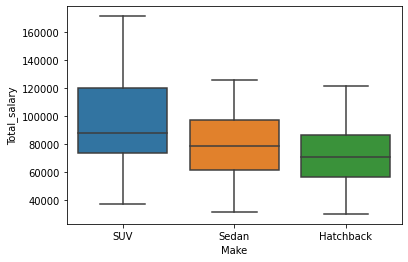

In [ ]:
sns.boxplot(x="Make", y="Total_salary", data=df)

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 36.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 70.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


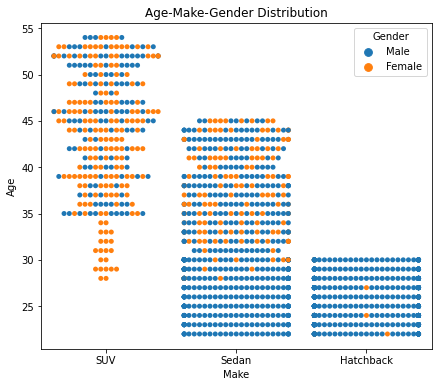

In [ ]:
plt.figure(figsize=(7, 6))

plt.title('Age-Make-Gender Distribution')
sns.swarmplot(x="Make", y="Age", data=df,hue='Gender')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 19.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 54.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 77.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


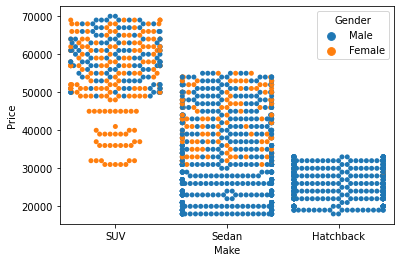

In [ ]:
sns.swarmplot(x="Make", y="Price", data=df,hue='Gender')

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 44.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 77.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


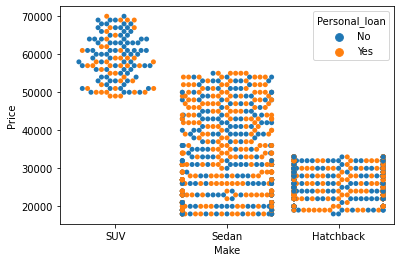

In [ ]:
sns.swarmplot(x="Make", y="Price", data=df1, hue='Personal_loan')

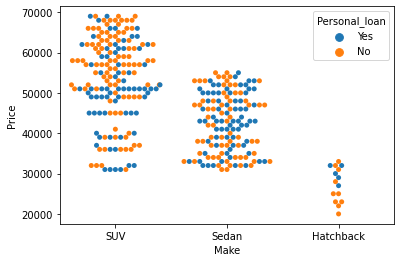

In [ ]:
sns.swarmplot(x="Make", y="Price", data=df2, hue='Personal_loan')

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 17.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 54.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 77.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


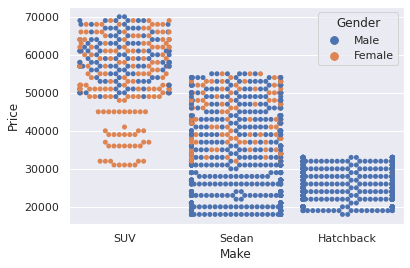

In [ ]:
sns.swarmplot(x="Make", y="Price", data=df,hue='Gender')

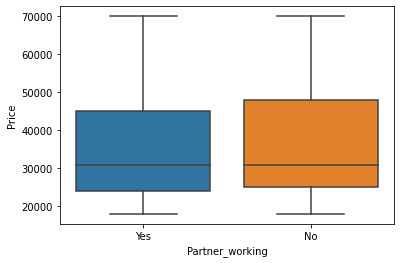

In [ ]:
sns.boxplot(x="Partner_working", y="Price", data=df)

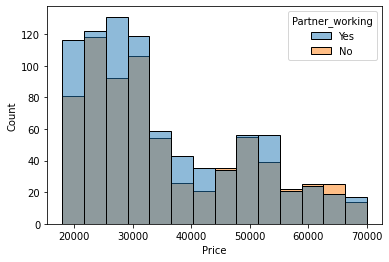

In [ ]:
sns.histplot(x='Price',data=df,hue="Partner_working")

In [ ]:
pd.crosstab(df['Make'],df['Gender'])

Gender,Female,Male
Make,,
Hatchback,15,563
SUV,170,122
Sedan,139,556


In [ ]:
pd.crosstab(df['Make'],df['No_of_Dependents'])

No_of_Dependents,0,1,2,3,4
Make,,,,,
Hatchback,15,11,181,253,118
SUV,5,34,87,114,52
Sedan,0,184,283,183,45


In [ ]:
pd.crosstab(df['Make'],df['Marital_status'],normalize=True)

Marital_status,Married,Single
Make,,
Hatchback,0.315655,0.053674
SUV,0.176358,0.010224
Sedan,0.419808,0.024281


In [ ]:
sns.set()  # use Seaborn styles

In [ ]:
pd.pivot_table(df,'Price', index=['Make','Profession'],
                     columns=[ 'Gender'],aggfunc=np.mean)

Gender                      Female          Male
Make      Profession                            
Hatchback Business             NaN  26315.972222
          Salaried    27466.666667  26610.909091
SUV       Business    53075.471698  61000.000000
          Salaried    53367.521368  58545.454545
Sedan     Business    42612.244898  31547.244094
          Salaried    42933.333333  33238.410596

Matrixs are really helpful

In [ ]:
pd.pivot_table(df,values=['Age'] ,index=['Profession', 'Gender'],
                     columns=[ 'Make','Partner_working','Marital_status'], aggfunc=len)

Age                                                \
Make              Hatchback                    SUV                  Sedan   
Partner_working          No            Yes      No            Yes      No   
Marital_status      Married Single Married Married Single Married Married   
Profession Gender                                                           
Business   Female       NaN    NaN     NaN    22.0    2.0    29.0    13.0   
           Male        92.0   51.0   145.0    15.0    1.0    18.0    91.0   
Salaried   Female       6.0    1.0     8.0    51.0    5.0    61.0    37.0   
           Male        99.0   32.0   144.0    40.0    8.0    40.0   109.0   

                                  
Make                              
Partner_working              Yes  
Marital_status    Single Married  
Profession Gender                 
Business   Female    7.0    29.0  
           Male     10.0   153.0  
Salaried   Female    7.0    46.0  
           Male     14.0   179.0

In [ ]:
pd.pivot_table(df,values=['Age'] ,index=['Personal_loan', 'House_loan'],
                     columns=[ 'Make'], aggfunc=len)

Age           
Make                     Hatchback  SUV Sedan
Personal_loan House_loan                     
No            No               172  170   198
              Yes              119   11   119
Yes           No               175  105   234
              Yes              116   11   151

In [ ]:
df.columns

Index(['Age', 'Gender', 'Profession', 'Marital_status', 'Education',
       'No_of_Dependents', 'Personal_loan', 'House_loan', 'Partner_working',
       'Salary', 'Partner_salary', 'Total_salary', 'Price', 'Make'],
      dtype='object')

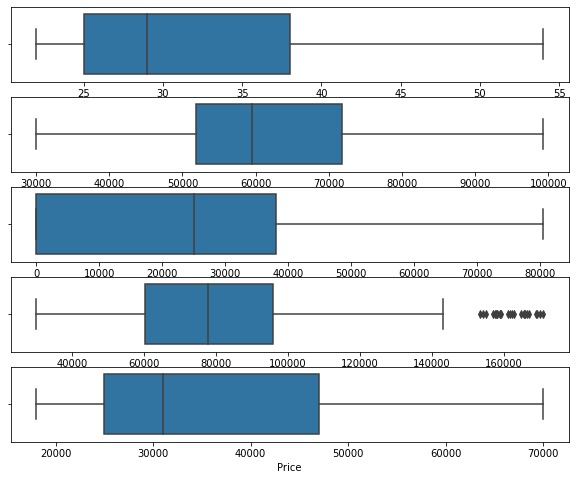

In [ ]:
fig, axs = plt.subplots(5)
fig.set_size_inches(10,8)

sns.boxplot(x="Age", data=df,ax=axs[0])

sns.boxplot(x="Salary", data=df,ax=axs[1])

sns.boxplot(x="Partner_salary", data=df,ax=axs[2])

sns.boxplot(x="Total_salary", data=df,ax=axs[3])

sns.boxplot(x="Price", data=df,ax=axs[4])

found outliers but they are due higher partner salary

In [ ]:
sns.boxplot(x="Total_salary", data=df,ax=axs[3])

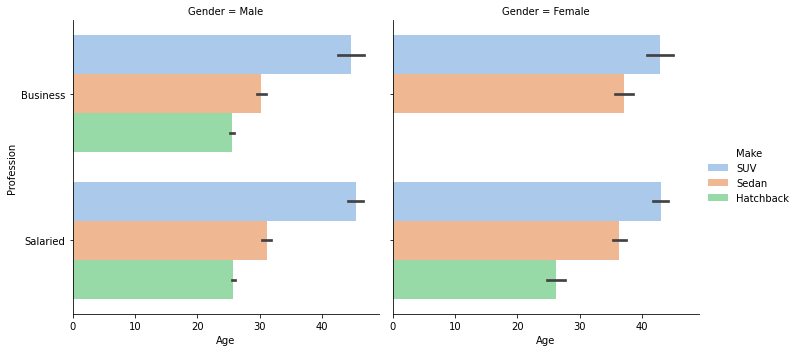

In [ ]:
sns.catplot(data=df, x="Age", y="Profession", hue="Make", col="Gender", kind='bar', palette='pastel')

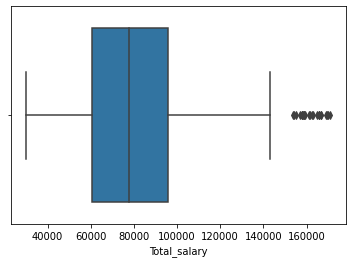

In [ ]:
sns.boxplot(x="Total_salary", data=df)

In [ ]:
df[df["Total_salary"]>140000]

,Age,Gender,Profession,Marital_status,Education,No_of_Dependents,Personal_loan,House_loan,Partner_working,Salary,Partner_salary,Total_salary,Price,Make
0,53,Male,Business,Married,Post Graduate,4,No,No,Yes,99300,70700.0,170000,61000,SUV
1,53,Female,Salaried,Married,Post Graduate,4,Yes,No,Yes,95500,70300.0,165800,61000,SUV
2,53,Female,Salaried,Married,Post Graduate,3,No,No,Yes,97300,60700.0,158000,57000,SUV
3,53,Female,Salaried,Married,Graduate,2,Yes,No,Yes,72500,70300.0,142800,61000,SUV
5,53,Female,Salaried,Married,Post Graduate,3,No,No,Yes,79800,60500.0,140300,57000,SUV
17,49,Female,Salaried,Married,Post Graduate,4,No,No,Yes,95100,70600.0,165700,64000,SUV
18,49,Female,Business,Married,Post Graduate,3,No,No,Yes,92600,70300.0,162900,58000,SUV
19,49,Male,Salaried,Married,Post Graduate,3,Yes,No,Yes,98400,60600.0,159000,54000,SUV
29,46,Female,Salaried,Married,Post Graduate,2,No,No,Yes,98300,70700.0,169000,61000,SUV
30,46,Male,Salaried,Married,Post Graduate,4,No,No,Yes,94900,70700.0,165600,67000,SUV


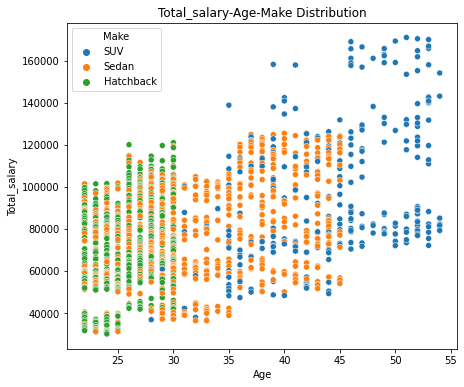

In [ ]:
plt.figure(figsize=(7, 6))
sns.scatterplot(data=df, x='Age', y='Total_salary', hue='Make')
plt.title('Total_salary-Age-Make Distribution')
plt.show()

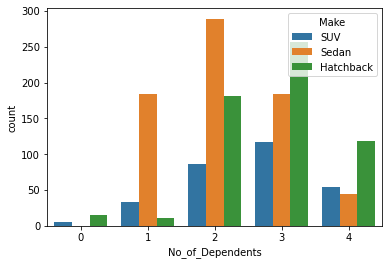

In [ ]:
sns.countplot(x="No_of_Dependents", hue="Make", data=df)

In [ ]:
df1=df[df['Gender']=='Male']
df2=df[df['Gender']=='Female']

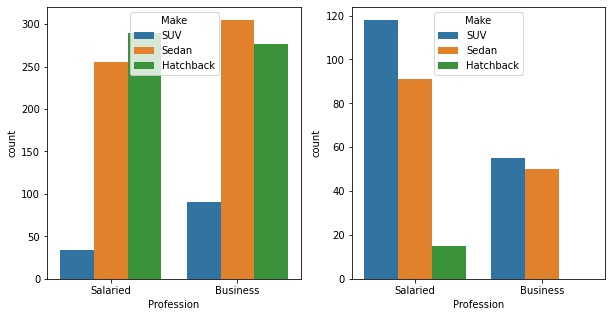

In [ ]:

fig, axes = plt.subplots(1, 2, sharex=True, figsize=(10,5))
sns.countplot(x="Profession", hue="Make", data=df1,ax=axes[0])
sns.countplot(x="Profession", hue="Make", data=df2,ax=axes[1])

<Figure size 720x504 with 0 Axes>

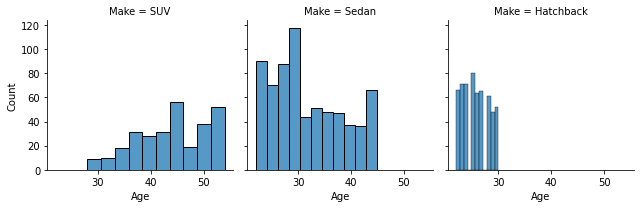

In [ ]:
plt.figure(figsize=(10,7))
g = sns.FacetGrid(df, col="Make")
g.map(sns.histplot, "Age")
plt.show()

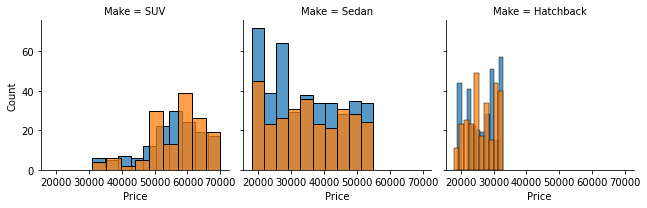

In [ ]:

g = sns.FacetGrid(df, col="Make",hue='Partner_working')
g.map(sns.histplot, "Price")


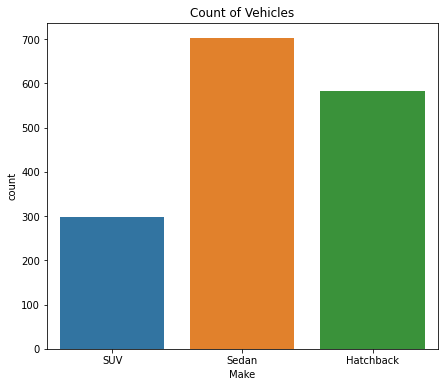

In [ ]:
plt.figure(figsize=(7, 6))
sns.countplot(x="Make", data=df)
plt.title('Count of Vehicles')
plt.show()

In [ ]:
df.columns

Index(['Age', 'Gender', 'Profession', 'Marital_status', 'Education',
       'No_of_Dependents', 'Personal_loan', 'House_loan', 'Partner_working',
       'Salary', 'Partner_salary', 'Total_salary', 'Price', 'Make'],
      dtype='object')

In [ ]:
plt.figure(figsize=(7, 6))
sns.scatterplot(data=df, x='Age', y='Total_salary', hue='Make')
plt.title('Total_salary-Age-Make Distribution')
plt.show()

In [ ]:
x=pd.pivot_table(df1,'Price', index=['Make'],columns=['Personal_loan'],
                      aggfunc=np.mean)
x

Personal_loan,No,Yes
Make,,
Hatchback,26701.067616,26199.300699
SUV,59950.000000,57545.454545
Sedan,31971.774194,33009.584665


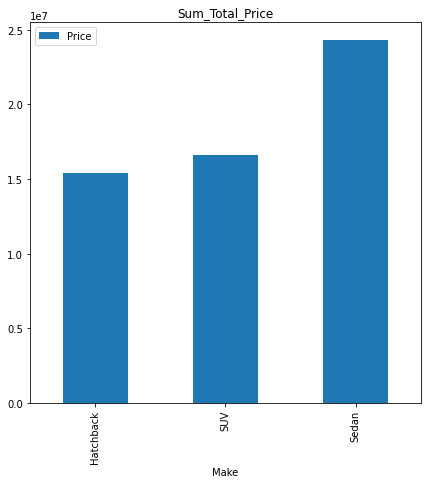

In [ ]:

x.plot(kind='bar',figsize=(7,7))
plt.title('Sum_Total_Price')
plt.show()

In [ ]:
x=pd.pivot_table(df,'Price', index=['Make'], columns=[ 'Gender'],
                      aggfunc=len)
x

Gender,Female,Male
Make,,
Hatchback,15,567
SUV,173,124
Sedan,141,561


In [ ]:
c=pd.crosstab(df['Make'],df['Gender'],normalize=True)
c

Gender,Female,Male
Make,,
Hatchback,0.009488,0.358634
SUV,0.109424,0.078431
Sedan,0.089184,0.354839


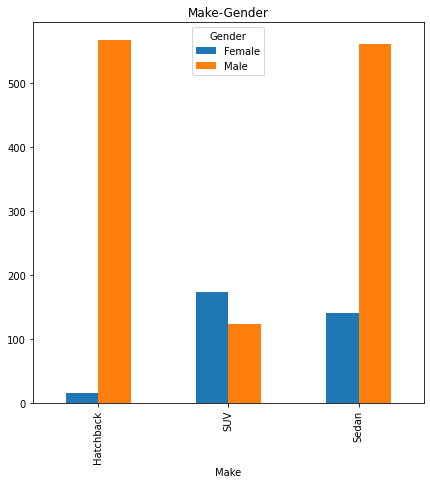

In [ ]:
x.plot(kind='bar',figsize=(7,7))
plt.title('Make-Gender')
plt.show()

In [ ]:
x=pd.pivot_table(df,'Price', index=['Make'], columns=[ 'Partner_working','Marital_status'],
                      aggfunc=len)
x

Partner_working      No            Yes
Marital_status  Married Single Married
Make                                  
Hatchback           197     84     301
SUV                 128     16     153
Sedan               250     38     414

In [ ]:
x=pd.pivot_table(df1,'Price', index=['Make'], columns=[ 'Profession'],
                      aggfunc=len)
x

Profession,Business,Salaried
Make,,
Hatchback,290,277
SUV,34,90
Sedan,256,305


In [ ]:
y=pd.pivot_table(df2,'Price', index=['Make'], columns=[ 'Profession'],
                      aggfunc=len)
y

Profession,Business,Salaried
Make,,
Hatchback,NaN,15.0
SUV,55.0,118.0
Sedan,50.0,91.0


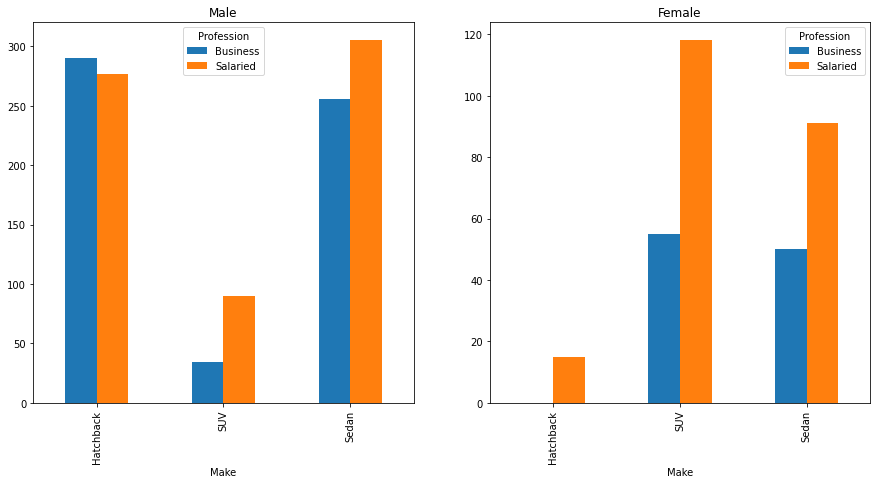

In [ ]:
fig, axes = plt.subplots(1, 2, sharex=True, figsize=(15,7))
x.plot(kind='bar',ax=axes[0])
axes[0].set_title('Male')
y.plot(kind='bar',ax=axes[1])
axes[1].set_title('Female')
plt.show()


In [ ]:
a=pd.pivot_table(df1,'Price', index=['Make'], columns=[ 'Personal_loan'])
a

Personal_loan,No,Yes
Make,,
Hatchback,26701.067616,26199.300699
SUV,59950.000000,57545.454545
Sedan,31971.774194,33009.584665


In [ ]:
b=pd.pivot_table(df2,'Price', index=['Make'], columns=[ 'Personal_loan'])
b

Personal_loan,No,Yes
Make,,
Hatchback,26200.000000,30000.000000
SUV,55217.821782,51041.666667
Sedan,42362.318841,43166.666667


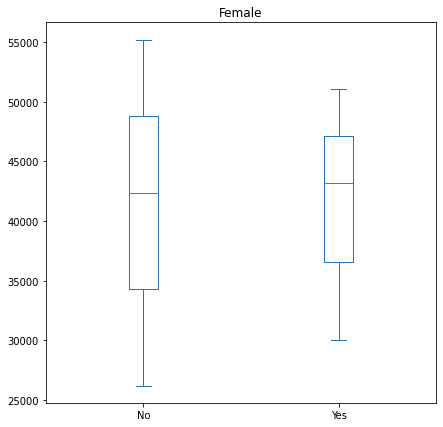

In [ ]:
b.plot(kind='box',figsize=(7,7))
plt.title('Female')
plt.show()

In [ ]:
x=pd.pivot_table(df,'Price', index=['Make'], columns=[ 'Education'],
                      aggfunc=len)
x

Education,Graduate,Post Graduate
Make,,
Hatchback,220,362
SUV,117,180
Sedan,259,443


In [ ]:
x=pd.pivot_table(df,'Price', index=['Make','Gender'], columns=[ 'No_of_Dependents'],
                      aggfunc=len)
x

No_of_Dependents     0      1      2      3      4
Make      Gender                                  
Hatchback Female   NaN    NaN    5.0    7.0    3.0
          Male    15.0   11.0  176.0  249.0  116.0
SUV       Female   3.0   34.0   54.0   59.0   23.0
          Male     2.0    NaN   33.0   58.0   31.0
Sedan     Female   NaN   65.0   76.0    NaN    NaN
          Male     NaN  119.0  213.0  184.0   45.0

In [ ]:
x=pd.pivot_table(df,'Price', index=['Make','Gender'], columns=[ 'Education'],
                      aggfunc=len)
x

Education         Graduate  Post Graduate
Make      Gender                         
Hatchback Female         5             10
          Male         215            352
SUV       Female        73            100
          Male          44             80
Sedan     Female        60             81
          Male         199            362

In [ ]:
x=pd.pivot_table(df,'Price', index=['Make','Marital_status'], columns=[ 'Gender'],
                      aggfunc=len)
x

Gender                    Female  Male
Make      Marital_status              
Hatchback Married             14   484
          Single               1    83
SUV       Married            166   115
          Single               7     9
Sedan     Married            127   537
          Single              14    24

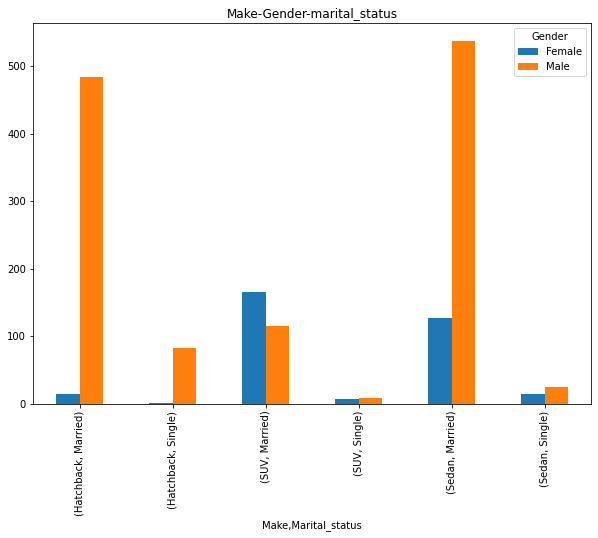

In [ ]:
x.plot(kind='bar',figsize=(10,7))

plt.title('Make-Gender-marital_status')
plt.show()

In [ ]:
z=pd.pivot_table(df,'Price', index=['Make','Profession'], columns=[ 'Gender'],
                      aggfunc=len)
z

Gender                Female   Male
Make      Profession               
Hatchback Business       NaN  290.0
          Salaried      15.0  277.0
SUV       Business      55.0   34.0
          Salaried     118.0   90.0
Sedan     Business      50.0  256.0
          Salaried      91.0  305.0

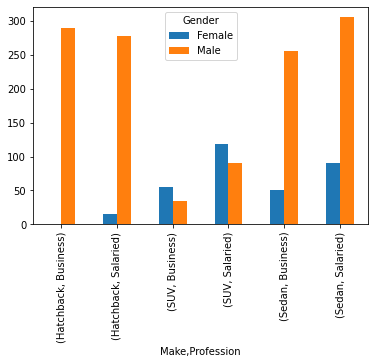

In [ ]:
z.plot(kind='bar')


In [ ]:
y=pd.pivot_table(df,'Price', index=['Make'],
                     columns=[ 'Marital_status'], aggfunc=len)

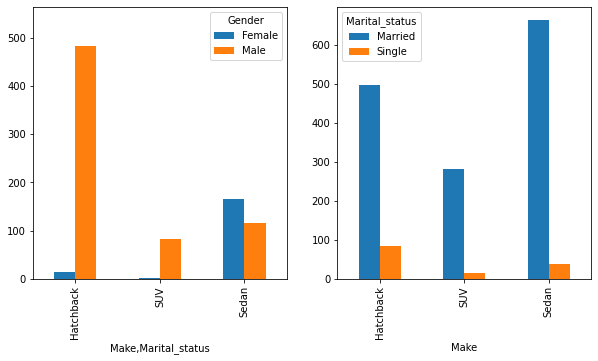

In [ ]:
fig, axes = plt.subplots(1, 2, sharex=True, figsize=(10,5))
x.plot(kind='bar',ax=axes[0])
y.plot(kind='bar',ax=axes[1])

In [ ]:
df.columns

Index(['Age', 'Gender', 'Profession', 'Marital_status', 'Education',
       'No_of_Dependents', 'Personal_loan', 'House_loan', 'Partner_working',
       'Salary', 'Total_salary', 'Price', 'Make', 'Partner_salary', 'check'],
      dtype='object')

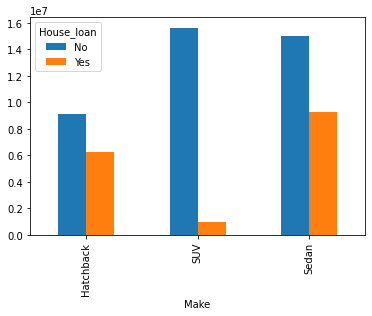

In [ ]:
x.plot(kind='bar')


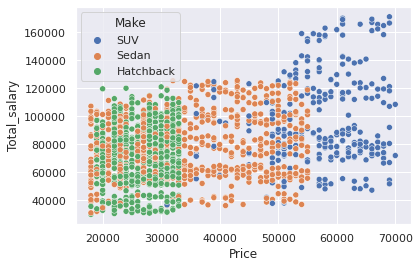

In [ ]:
sns.scatterplot(x='Price',y='Total_salary',data=df,hue='Make')

In [ ]:
, fig, axes = plt.subplots(1, 2, sharex=True, figsize=(10,5))
fig.suptitle('Bigger 1 row x 2 columns axes with no data')
axes[0].set_title('Title of the first chart')

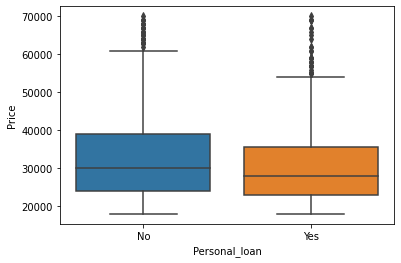

In [ ]:
sns.boxplot(data=df1,y='Price',x='Personal_loan')

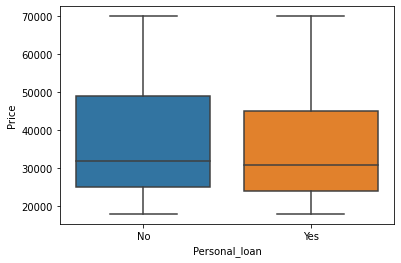

In [ ]:
sns.boxplot(data=df,y='Price',x='Personal_loan')

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 34.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


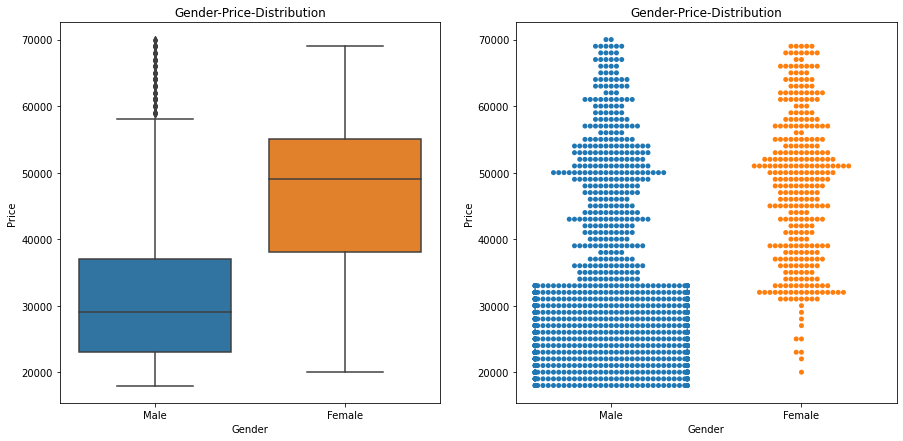

In [ ]:
fig, axes = plt.subplots(1, 2, sharex=True, figsize=(15,7))

sns.boxplot(data=df,y='Price',x='Gender',ax=axes[0])
sns.swarmplot(data=df,y='Price',x='Gender',ax=axes[1])
axes[0].set_title('Gender-Price-Distribution')
axes[1].set_title('Gender-Price-Distribution')
plt.show()


In [ ]:
df.groupby('Gender').Price.describe().T

Gender,Female,Male
count,329.000000,1252.000000
mean,47705.167173,32416.134185
std,11244.836378,12366.253107
min,20000.000000,18000.000000
25%,38000.000000,23000.000000
50%,49000.000000,29000.000000
75%,55000.000000,37000.000000
max,69000.000000,70000.000000


/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 6.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 7.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


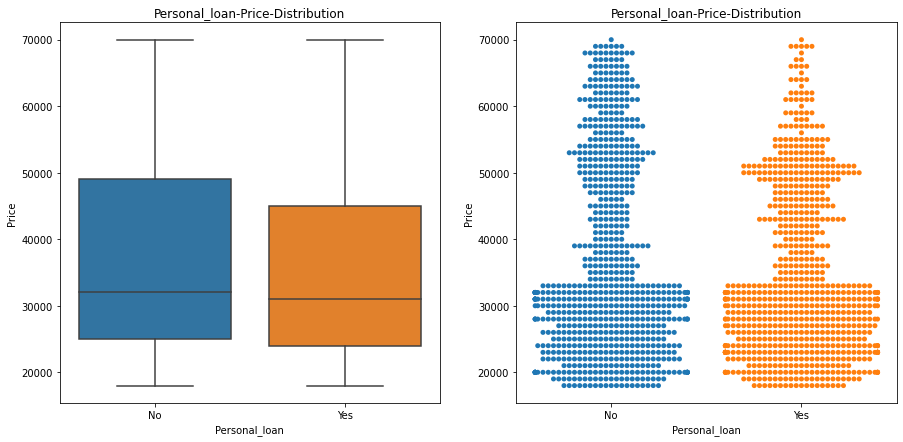

In [ ]:
fig, axes = plt.subplots(1, 2, sharex=True, figsize=(15,7))

sns.boxplot(data=df,y='Price',x='Personal_loan',ax=axes[0])
sns.swarmplot(data=df,y='Price',x='Personal_loan',ax=axes[1])
axes[0].set_title('Personal_loan-Price-Distribution')
axes[1].set_title('Personal_loan-Price-Distribution')
plt.show()


In [ ]:
df.groupby('Personal_loan').Price.describe().T

Personal_loan,No,Yes
count,789.000000,792.000000
mean,36742.712294,34457.070707
std,14534.344526,12578.780338
min,18000.000000,18000.000000
25%,25000.000000,24000.000000
50%,32000.000000,31000.000000
75%,49000.000000,45000.000000
max,70000.000000,70000.000000


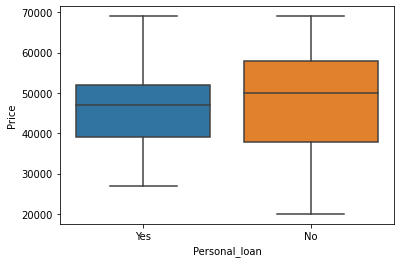

In [ ]:
sns.boxplot(data=df2,y='Price',x='Personal_loan')

In [ ]:
df1.groupby('Personal_loan').Price.describe().T

Personal_loan,No,Yes
count,609.000000,643.00000
mean,33215.106732,31659.40902
std,13230.050835,11447.45619
min,18000.000000,18000.00000
25%,24000.000000,23000.00000
50%,30000.000000,28000.00000
75%,39000.000000,35500.00000
max,70000.000000,70000.00000


In [ ]:
df2.groupby('Personal_loan').Price.describe().T

Personal_loan,No,Yes
count,180.000000,149.000000
mean,48677.777778,46530.201342
std,12241.360221,9821.072936
min,20000.000000,27000.000000
25%,37750.000000,39000.000000
50%,50000.000000,47000.000000
75%,58000.000000,52000.000000
max,69000.000000,69000.000000


/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 9.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


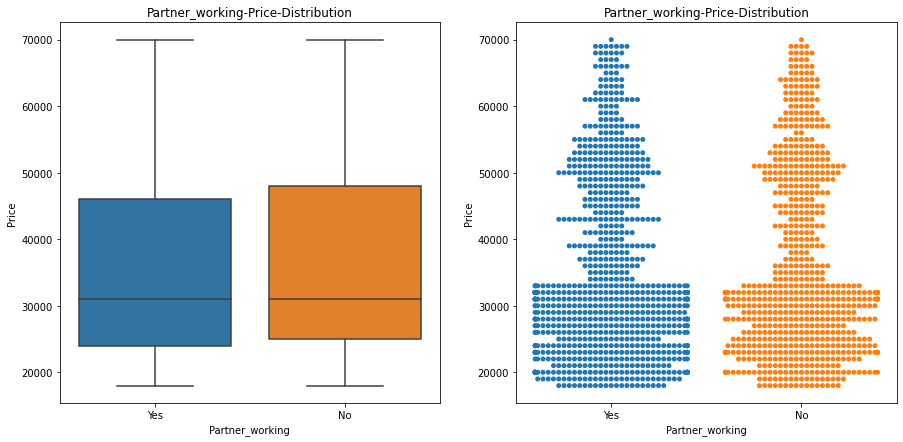

In [ ]:
fig, axes = plt.subplots(1, 2, sharex=True, figsize=(15,7))

sns.boxplot(data=df,y='Price',x='Partner_working',ax=axes[0])
sns.swarmplot(data=df,y='Price',x='Partner_working',ax=axes[1])
axes[0].set_title('Partner_working-Price-Distribution')
axes[1].set_title('Partner_working-Price-Distribution')
plt.show()


In [ ]:
df.groupby('Partner_working').Price.describe().T

Partner_working,No,Yes
count,713.000000,868.000000
mean,36000.000000,35267.281106
std,13817.734086,13479.532555
min,18000.000000,18000.000000
25%,25000.000000,24000.000000
50%,31000.000000,31000.000000
75%,48000.000000,46000.000000
max,70000.000000,70000.000000
